##Install Dependency

In [ ]:
!pip install gcsfs==2024.09.0 fsspec==2024.6.1
!pip install transformers
!pip install datasets
# !pip install --upgrade torch torchvision torchaudio
!pip install evaluate
!pip install accelerate -U

Reason for being yanked: requirements incorrect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: gcsfs
    Found existing installation: gcsfs 2024.10.0
    Uninstalling gcsfs-2024.10.0:
      Successfully uninstalled gcsfs-2024.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import torch

##dataset download

In [ ]:
import kagglehub
!rm -rf /content/dataset
!mkdir -p /content/dataset
# Download latest version
path = kagglehub.dataset_download("anishmohant/fake-job-posting-balanced-866")

print("Path to dataset files:", path)

!cp -r {path}/* /content/dataset/

100%|██████████| 1.34M/1.34M [00:00<00:00, 119MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anishmohant/fake-job-posting-balanced-866/versions/1


In [ ]:
df = pd.read_csv('/content/dataset/balanced_jop_posting.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
4,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,6455,Inside Sales Representative,"US, NJ, lakewood",NaN,NaN,NaN,We are looking for a talented and competitive ...,2+ years of inside sales experienceTrack recor...,Competitive PayBase + CommissionFlexible Hours,0,1,1,Full-time,NaN,NaN,Internet,NaN,0
1728,2728,Web designer,"RU, MOW, Moscow",Product Management,NaN,"УУРРАА - технологическая компания, работающая ...",Create and present:-Mockups and design interfa...,Excellent knowledge of basic editors: Adobe PS...,We are thinking global and are willing to inve...,0,1,0,NaN,NaN,NaN,NaN,Product Management,0
1729,10484,.NET developer,"GB, LND, London",NaN,40000-70000,"21st century financial software, in the cloudF...",FundApps is a startup that helps investment ma...,You’ll be part of a team that cares passionate...,Work environmentFlat hierarchy &amp; absolutel...,0,1,1,Full-time,NaN,NaN,Computer Software,Information Technology,0
1730,14413,Suneris - 2015 Research and Development Intern...,"US, NY, Brooklyn",NaN,NaN,"Suneris, Inc is a medical device company,based...","Suneris, Inc is a medical device company that ...",Program 1 RequirementsBackground in Biochemist...,NaN,0,1,1,Full-time,Internship,Bachelor's Degree,Biotechnology,Research,0


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
4,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [ ]:
import numpy as np

##dataset prepocessing

In [ ]:
new_data = []

for index, row in df.iterrows():
  combined = f"""{row['employment_type'] if not pd.isna(row['employment_type']) else ''} job vacancy for {row['title']} {'on '+row['department'] if not pd.isna(row['department']) else ''} {'as '+row['function'] if not pd.isna(row['function']) else ''} {'in '+row['industry'] if not pd.isna(row['industry']) else ''} industry. salary ranging {row['salary_range'] if not pd.isna(row['salary_range']) else 'not mentioned'}. company {'has logo' if row['has_company_logo']== '1' else ''} located on {row['location']}, {'and the profile is as follow : '+ row['company_profile'] if not pd.isna(row['company_profile']) else ''}. {'worker get '+ row['benefits']+'.' if not pd.isna(row['benefits']) else ''} {'the job is telecommunting' if row['telecommuting']=='1' else ''}. {'requring '+ row['requirements'] if not pd.isna(row['requirements']) else ''}. {'minimum experience is'+row['required_experience']+' experience' if not pd.isna(row['required_experience']) else ''}. {'minimum education as'+ row['required_education'] if not pd.isna(row['required_education']) else ''}. {'there will be question later.' if row['has_questions']=='1' else ''}"""
  combined = re.sub(r'http\S+', '', combined)
  combined = re.sub(r'#\S+', '', combined)
  combined = ''.join(i for i in combined if ord(i) < 128)
  new_data.append({
      "job_text":combined,
      "label":'fake' if(row['fraudulent']==1) else 'real'
      })

new_df = pd.DataFrame(new_data)
new_df

,job_text,label
0,Full-time job vacancy for IC&E Technician on O...,fake
1,job vacancy for Forward Cap. industry. sal...,fake
2,Full-time job vacancy for Technician Instrumen...,fake
3,job vacancy for Sales Executive on Sales as S...,fake
4,Full-time job vacancy for IC&E Technician Mt P...,fake
...,...,...
1727,Full-time job vacancy for Inside Sales Represe...,real
1728,job vacancy for Web designer on Product Manag...,real
1729,Full-time job vacancy for .NET developer as I...,real
1730,Full-time job vacancy for Suneris - 2015 Resea...,real


In [ ]:
new_df['job_text'][0]

"Full-time job vacancy for IC&E Technician on Oil & Energy as Other in Oil & Energy industry. salary ranging 95000-115000. company  located on US, , Stocton, CA, and the profile is as follow :                                         Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increasesSignificant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. You'll save thousands on daily expendituresProfessional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred dire

In [ ]:
new_df.to_csv('/content/dataset/jobs_combined.csv',index=False)

In [ ]:
job_datasets = pd.read_csv('/content/dataset/jobs_combined.csv')
job_datasets

,job_text,label
0,Full-time job vacancy for IC&E Technician on O...,fake
1,job vacancy for Forward Cap. industry. sal...,fake
2,Full-time job vacancy for Technician Instrumen...,fake
3,job vacancy for Sales Executive on Sales as S...,fake
4,Full-time job vacancy for IC&E Technician Mt P...,fake
...,...,...
1727,Full-time job vacancy for Inside Sales Represe...,real
1728,job vacancy for Web designer on Product Manag...,real
1729,Full-time job vacancy for .NET developer as I...,real
1730,Full-time job vacancy for Suneris - 2015 Resea...,real


In [ ]:
# prompt: do case folding in lower, stemming, and lemmatization with snowball algorithm on job text row

import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = SnowballStemmer("english",ignore_stopwords=True)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Performs case folding (lower casing), stemming, and lemmatization on a given text.

    Args:
        text (str): The input text.

    Returns:
        str: The preprocessed text.
    """
    if not isinstance(text, str):
        return ""
    # Case folding (lower casing)
    text = text.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # Join tokens back into a string
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text

# Apply the preprocessing to the 'job_text' column
job_datasets['job_text'] = job_datasets['job_text'].apply(preprocess_text)
job_datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,job_text,label
0,full-tim job vacanc for ic & e technician on o...,fake
1,job vacanc for forward cap . industri . salari...,fake
2,full-tim job vacanc for technician instrument ...,fake
3,job vacanc for sale execut on sale a sale indu...,fake
4,full-tim job vacanc for ic & e technician mt p...,fake
...,...,...
1727,full-tim job vacanc for insid sale repres in i...,real
1728,job vacanc for web design on product manag a p...,real
1729,full-tim job vacanc for .net develop a inform ...,real
1730,full-tim job vacanc for suneri - 2015 research...,real


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Create mapping from id2label and label2id
id2label = {0: "fake", 1: "real"}
label2id = {"fake": 0, "real": 1}

print(f"Label to ID mapping: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to ID mapping: {'fake': 0, 'real': 1}
ID to Label mapping: {0: 'fake', 1: 'real'}


In [ ]:
from datasets import Dataset

In [ ]:
dataset = Dataset.from_pandas(job_datasets)
dataset

Dataset({
    features: ['job_text', 'label'],
    num_rows: 1732
})

In [ ]:
def map_labels_to_number(data):
  data["label"] = label2id[data["label"]]
  return data

In [ ]:
dataset = dataset.map(map_labels_to_number)
dataset[:5]

Map:   0%|          | 0/1732 [00:00<?, ? examples/s]

{'job_text': ['full-tim job vacanc for ic & e technician on oil & energi a other in oil & energi industri . salari rang 95000-115000. compani locat on u , , stocton , ca , and the profil is a follow : staf & amp ; recruit done right for the oil & amp ; energi industri ! repres candid are automat grant the follow perk : expert negoti on your behalf , maxim your compens packag and impliment ongo increasessignific sign bonus by refin resourc ( in addit to any potenti sign bonus our client compani offer ) 1 year access to anyperk : signific corpor discount on cell phone , event ticket , hous clean and everyth inbetween . you ll save thousand on daili expendituresprofession reloc servic for out of town candid * all candid are encourag to particip in our referr bonus program rang anywher from $ 500 - $ 1,000 for all success hire candid ... refer direct to the refin resourc teampleas submit referr via onlin referr formthank you and we look forward to work with you soon ! [ click to enlarg ima

In [ ]:
dataset = dataset.train_test_split(test_size=0.3,seed=42)
dataset

DatasetDict({
    train: Dataset({
        features: ['job_text', 'label'],
        num_rows: 1212
    })
    test: Dataset({
        features: ['job_text', 'label'],
        num_rows: 520
    })
})

In [ ]:
import random
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(f"[INFO] Random sample from training dataset:")
print(f"Text: {random_sample_train['job_text']}\nLabel: {random_sample_train['label']} ({id2label[random_sample_train['label']]})\n")
print(f"[INFO] Random sample from testing dataset:")
print(f"Text: {random_sample_test['job_text']}\nLabel: {random_sample_test['label']} ({id2label[random_sample_test['label']]})")

[INFO] Random sample from training dataset:
Text: job vacanc for strateg account director - london on busi : sale industri . salari rang not mention . compani locat on gb , , london , and the profil is a follow : we build softwar for fashion retail , to help them make the right commerci decis about what to sell , and how to price it . fashion is the 4th biggest industri in the world , so this is actual a huge problem econom , a well a environment for everyon in the world . the guardian call u one of the 20 hottest london startup , and we re a quick grow team , with a product use by some of the best retail in the world , and we re back by the smartest investor in europ , the same one who back etsi , dropbox , aso and net-a-port .. . . . .
Label: 1 (real)

[INFO] Random sample from testing dataset:
Text: full-tim job vacanc for custom success manag - portugues speak a custom servic in inform technolog and servic industri . salari rang not mention . compani locat on u , ca , san jose , an

In [ ]:
def tokenize_data(data):
  return tokenizer(
      data["job_text"],
      truncation=True,
      padding="max_length",  # Ensure padding to the maximum length
      max_length=512,        # Explicitly set the maximum length
      return_tensors="pt"    # Return PyTorch tensors
  )

In [ ]:
tokenized_dataset = dataset.map(tokenize_data, batched=True)
tokenized_dataset

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['job_text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1212
    })
    test: Dataset({
        features: ['job_text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 520
    })
})

In [ ]:
# Get two samples from the tokenized dataset
train_tokenized_sample = tokenized_dataset["train"][random.randint(0, len(dataset["train"]))]
test_tokenized_sample = tokenized_dataset["test"][random.randint(0, len(dataset["test"]))]

for key in train_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {train_tokenized_sample[key]}")
    # print(f"Test sample: {test_tokenized_sample[key]}")
    print("")


[INFO] Key: job_text
Train sample: full-tim job vacanc for control engin - farmington hill , mi on control engin a engin in automot industri . salari rang not mention . compani locat on u , mi , farmington hill , and the profil is a follow : system technolog intern , inc. ( sti ) , a full servic innov profession servic corporationserv in virtual everi industri . sti offer profession servic in the technical/engin , it ( inform technolog ) , creativ and market , busi analyst , account and offic support area .. worker get best benefit in the industri .. . requr plc program and debug experi in a manufactur environ with some automot experi .. minimum experi ismid-senior level experi . minimum educ asassoci degre .

[INFO] Key: label
Train sample: 0

[INFO] Key: input_ids
Train sample: [101, 1554, 118, 189, 4060, 2261, 191, 16604, 26405, 1111, 1654, 4035, 10533, 118, 7718, 1633, 4665, 117, 1940, 1113, 1654, 4035, 10533, 170, 4035, 10533, 1107, 12365, 21277, 1107, 27650, 2047, 119, 21718, 581

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# accuracy_metric = evaluate.load("accuracy")
# f1_metric = evaluate.load("f1")
# recall_metric = evaluate.load("recall")
# precision_metric = evaluate.load("precision")


def compute_metrics(eval_pred):
  """
  Computes the accuracy of a model by comparing the predictions and labels.
  """
  predicted_labels = np.argmax(eval_pred.predictions, axis=1)
  true_labels = eval_pred.label_ids

  # 2. Calculate metrics
  accuracy = float(accuracy_score(true_labels, predicted_labels))
  precision = float(precision_score(true_labels, predicted_labels))
  recall = float(recall_score(true_labels, predicted_labels))
  f1 = float(f1_score(true_labels, predicted_labels))


  # Get highest prediction probability of each prediction if predictions are probabilities
  # if len(predictions.shape) >= 2:
  # predictions = np.argmax(logits, axis=-1)

  # return accuracy_metric.compute(predictions=predictions, references=labels)

  # Return a dictionary of metrics
  return {
      "accuracy": accuracy,
      "f1": f1,
      "recall": recall,
      "precision": precision
  }

In [ ]:
# Get id and label mappings
print(f"id2label: {id2label}")
print(f"label2id: {label2id}")

id2label: {0: 'fake', 1: 'real'}
label2id: {'fake': 0, 'real': 1}


In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(
    "google-bert/bert-base-cased",
    num_labels=2, # can customize this to the number of classes in your dataset
    id2label=id2label, # mappings from class IDs to the class labels (for classification tasks)
    label2id=label2id
    )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def count_params(model):
    """
    Count the parameters of a PyTorch model.
    """
    trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_parameters = sum(p.numel() for p in model.parameters())

    return {"trainable_parameters": trainable_parameters, "total_parameters": total_parameters}

# Count the parameters of the model
count_params(model)

{'trainable_parameters': 108311810, 'total_parameters': 108311810}

In [ ]:
!rm -rf /content/models

In [ ]:
# Create model output directory
from pathlib import Path

# Create models directory
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name
model_save_name = "fake_job_model"

# Create model save path
model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/fake_job_model')

In [ ]:
from transformers import TrainingArguments

print(f"[INFO] Saving model checkpoints to: {model_save_dir}")

# Create training arguments
training_args = TrainingArguments(
    auto_find_batch_size=True,
    output_dir=model_save_dir,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    eval_strategy="epoch", # was previously "evaluation_strategy"
    save_strategy="epoch",
    save_total_limit=3, # limit the total amount of save checkpoints (so we don't save num_epochs checkpoints)
    use_cpu=False, # set to False by default, will use CUDA GPU or MPS device if available
    seed=42, # set to 42 by default for reproducibility
    load_best_model_at_end=True, # load the best model when finished training
    metric_for_best_model="eval_loss", # or another relevant metric like 'f1'
    greater_is_better=False, # Since we want to minimize loss
    # Early stopping patience
    # early_stopping_patience=3,
    logging_strategy="epoch", # log training results every epoch
    report_to="none", # optional: log experiments to Weights & Biases/other similar experimenting tracking services (we'll turn this off for now)
    # push_to_hub=True # optional: automatically upload the model to the Hub (we'll do this manually later on)
    # hub_token="your_token_here" # optional: add your Hugging Face Hub token to push to the Hub (will default to huggingface-cli login)
    hub_private_repo=False # optional: make the uploaded model private (defaults to False)
    # optim
)

# Optional: Print out training_args to inspect (warning, it is quite a long output)
# training_args

[INFO] Saving model checkpoints to: models/fake_job_model


In [ ]:
from transformers import Trainer

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer, # Pass tokenizer to the Trainer for dynamic padding (padding as the training happens) (see "data_collator" in the Trainer docs)
    compute_metrics=compute_metrics
)

<ipython-input-136-3191bb1bf5e6>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.567500,0.484948,0.815385,0.769231,0.637450,0.969697
2,0.372100,0.265976,0.909615,0.908382,0.928287,0.889313
3,0.211000,0.193589,0.934615,0.930894,0.912351,0.950207
4,0.112600,0.185503,0.946154,0.943548,0.932271,0.955102
5,0.056300,0.177134,0.948077,0.944559,0.916335,0.974576


In [ ]:
training_logs = trainer.state.log_history
dflog= pd.DataFrame(training_logs)
dflog

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_f1,eval_recall,eval_precision,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.5675,3.597686,0.00004,1.0,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,38,0.484948,0.815385,0.769231,0.637450,0.969697,3.4788,149.477,4.887,NaN,NaN,NaN,NaN,NaN
2,0.3721,14.716077,0.00003,2.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,76,0.265976,0.909615,0.908382,0.928287,0.889313,3.4864,149.151,4.876,NaN,NaN,NaN,NaN,NaN
4,0.2110,7.762236,0.00002,3.0,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,3.0,114,0.193589,0.934615,0.930894,0.912351,0.950207,3.4762,149.588,4.890,NaN,NaN,NaN,NaN,NaN
6,0.1126,13.885838,0.00001,4.0,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,152,0.185503,0.946154,0.943548,0.932271,0.955102,3.4794,149.451,4.886,NaN,NaN,NaN,NaN,NaN
8,0.0563,0.528887,0.00000,5.0,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,5.0,190,0.177134,0.948077,0.944559,0.916335,0.974576,3.5348,147.109,4.809,NaN,NaN,NaN,NaN,NaN


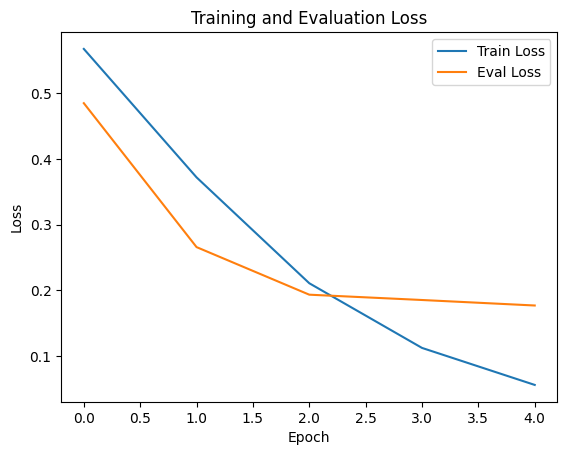

In [ ]:
training_logs = trainer.state.log_history

train_loss_values = [log['loss'] for log in training_logs if 'loss' in log]
eval_loss_values = [log['eval_loss'] for log in training_logs if 'eval_loss' in log]

import matplotlib.pyplot as plt

plt.plot(train_loss_values, label='Train Loss')
plt.plot(eval_loss_values, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

loss: 0.031405530869960785
Accuracy: 0.9942244224422442
Precision: 0.9983606557377049
Recall: 0.9902439024390244
F1 Score: 0.9942857142857143


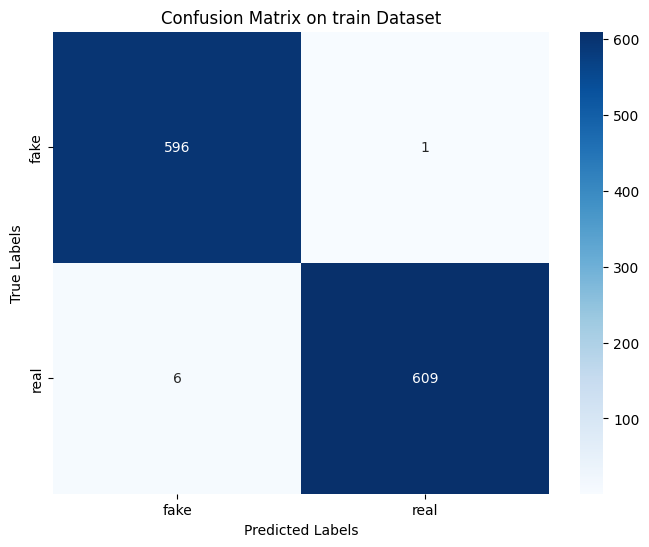

In [ ]:
import evaluate
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get predictions and true labels
predictions = trainer.predict(tokenized_dataset["train"])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(torch.tensor(predictions.predictions), torch.tensor(true_labels)).item()

# 2. Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# 3. Print metrics
print(f"loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 4. Calculate and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=id2label.values(), yticklabels=id2label.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on train Dataset")
plt.show()

loss: 0.1771334856748581
Accuracy: 0.948076923076923
Precision: 0.9494765365334117
Recall: 0.948076923076923
F1 Score: 0.9479814872310908


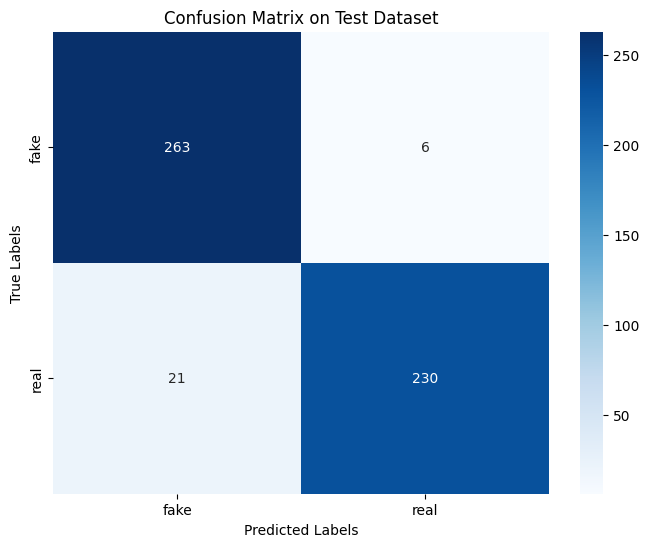

In [ ]:
import evaluate
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get predictions and true labels
predictions = trainer.predict(tokenized_dataset["test"])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(torch.tensor(predictions.predictions), torch.tensor(true_labels)).item()

# 2. Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels,average='weighted')
recall = recall_score(true_labels, predicted_labels,average='weighted')
f1 = f1_score(true_labels, predicted_labels,average='weighted')

# 3. Print metrics
print(f"loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 4. Calculate and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=id2label.values(), yticklabels=id2label.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Test Dataset")
plt.show()

In [ ]:
test_tokenized_sample = tokenized_dataset["test"][random.randint(0, len(dataset["test"]))]
for key in test_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {test_tokenized_sample[key]}")
    print("")

predictions = trainer.predict([test_tokenized_sample])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(torch.tensor(predictions.predictions), torch.tensor(true_labels)).item()

# 2. Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)

# 3. Print metrics
print(f"true label: {id2label[true_labels[0]]}")
print(f"predicts label: {id2label[predicted_labels[0]]}")
print(f"loss: {loss}")

[INFO] Key: job_text
Train sample: full-tim job vacanc for countri director - germany/austria on commerci a sale in event servic industri . salari rang not mention . compani locat on de , , berlin , and the profil is a follow : about the companyw are ticketscript - the european market leader in digit self-ticket . whether it massiv danc event , festiv , gig , outdoor cinema , fair , theater show , exhibit , comedi night , or award ceremoni - we do them all ! we believ in empow our custom . their success is our success . so far over 50,000 event have work with u - and this is only the begin . we have offic in london , amsterdam , antwerp , berlin and barcelona and are rapid expand across europ .. worker get job detailsdepart : commercialjob type : full-tim ( 40 hr ) job locat ( s ) : berlin , decontactif you are interest in appli for this posit plea send your cv + cover letter to with the subject line countri director de/aut .. . requr your profilean experienc and driven commerci profes

true label: real
predicts label: real
loss: 0.010637957602739334


In [ ]:
test_tokenized_sample = tokenized_dataset["test"][random.randint(0, len(dataset["test"]))]
for key in test_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {test_tokenized_sample[key]}")
    print("")

predictions = trainer.predict([test_tokenized_sample])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(torch.tensor(predictions.predictions), torch.tensor(true_labels)).item()

# 2. Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)

# 3. Print metrics
print(f"true label: {id2label[true_labels[0]]}")
print(f"predicts label: {id2label[predicted_labels[0]]}")
print(f"loss: {loss}")
print(f"Accuracy: {accuracy}")

[INFO] Key: job_text
Train sample: full-tim job vacanc for van driver on file driver a custom servic in transportation/trucking/railroad industri . salari rang 23000-28000. compani locat on u , tx , austin , and the profil is a follow : the accion stori began more than 100 year ago in the austin , tx with one famili own establish . today , accion ha grown into a nationwid organaz with over 260 store . accion success is attribut to our uniqu nich in the market offer current financeopt at competit price pair with custom servic and a person shop experi . join the accion stori today ! . worker get full- time benefit . . requr graduat from an accredit high school/g program . one ( 1 ) year job relat experi or 15 hour of colleg or a combin of the two . texa driver licens with a good drive prolong kneel , sit , stand , walk , climb , twist , and the abil to lift and carri file , box , and other materi up to 25 lbs. , unassist . mandatori drug test prior to and during employ .. minimum experi 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


true label: fake
predicts label: fake
loss: 0.01965229958295822
Accuracy: 1.0


In [ ]:
trainer.save_model('/content/best')

In [ ]:
!zip -r /content/best.zip /content/best

  adding: content/best/ (stored 0%)
  adding: content/best/vocab.txt (deflated 49%)
  adding: content/best/tokenizer_config.json (deflated 75%)
  adding: content/best/special_tokens_map.json (deflated 42%)
  adding: content/best/training_args.bin (deflated 52%)
  adding: content/best/model.safetensors (deflated 7%)
  adding: content/best/config.json (deflated 50%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/best.zip /content/drive/MyDrive/